# MIRI zero point offset
From MIRI-TR-00008-UA- RSCD :  
“When the reset switch FET is opened, clock feedthrough also occurs and contributes to the total error voltage. When the reset switch FET swings from closed to open (on to off) an error in the source voltage is introduced by a coupling through the capacitance between the gate and source and the capacitance of the source itself. This voltage error is proportional to the reset voltage and the source voltage. The larger the voltage difference the larger the error. This type of error explains why the initial frames in an integration are offset downward more when the previous integration was a bright source rather than a low illumination source.”

==> We wish to check whether such a trend is actually apparent in MIRI data.

### Preamble

In [1]:
#--load python modules
import funcs
import mrsobs

import itertools
import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#--define work directory
workDir  = '/Users/ioannisa/Desktop/python/miri_devel/'
d2cMapDir = workDir+'notebooks/distortionMaps/'
lvl1path = workDir+'CV3_data/LVL1/'

### MIRI MRS CV3 data
First the CV3 MIRM108 dataset is examined. This dataset is part of MRS test ID MRS_RAD_14. The ramps from these MRS detector images were acquired with the end goal to derive a non-linearity correction for the MRS detectors.

In [3]:
#--select MRS band
band = '1A'

In [35]:
#--CV3 MIRM108 (MRS_RAD_14, ramps purposed for non-linearity correction)
filename = mrsobs.MIRI_internal_calibration_source_nonlinearity_correction(lvl1path,band,output='filename').replace('_LVL2','')

image_hdu = fits.open(filename)
image_data = fits.getdata(filename)[:,:1024,:].astype('float')

print(filename.split('LVL1/')[1])
image_shape = image_data.shape
nints       = image_hdu[0].header['NINT']
ngroups     = image_hdu[0].header['NGROUP']
nframes     = image_shape[0]
readout     = image_hdu[0].header['READOUT']
frame_delta_time = image_hdu[0].header['TFRAME']
print('Number of integrations: {}'.format(nints))
print('Number of groups/frames per integration: {}'.format(ngroups))
print('Total number of frames: {}'.format(nframes))
print('Readout: {}'.format(readout))
print('Time between samples: {} sec'.format(frame_delta_time))
print('LVL1 data shape: {}'.format(image_shape))

MIRM108-SHORT-6021192005_1_495_SE_2016-01-21T20h36m13.fits
Number of integrations: 6
Number of groups/frames per integration: 60
Total number of frames: 360
Readout: FAST
Time between samples: 2.77504 sec
LVL1 data shape: (360, 1024, 1032)


In [36]:
image_hdu.close()

<IPython.core.display.Javascript object>


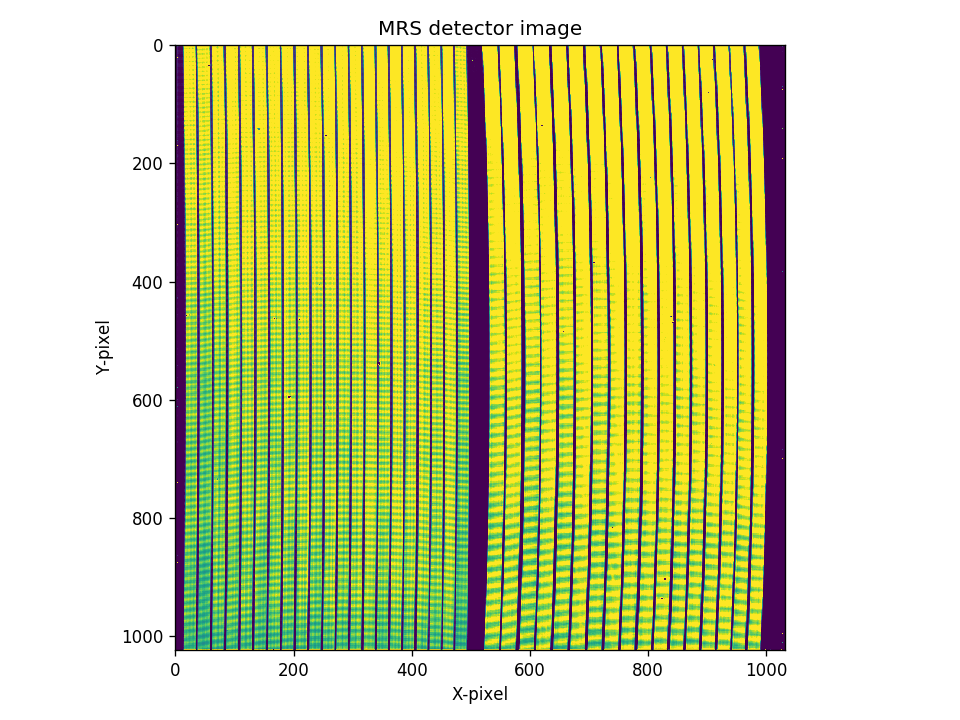

<IPython.core.display.Javascript object>


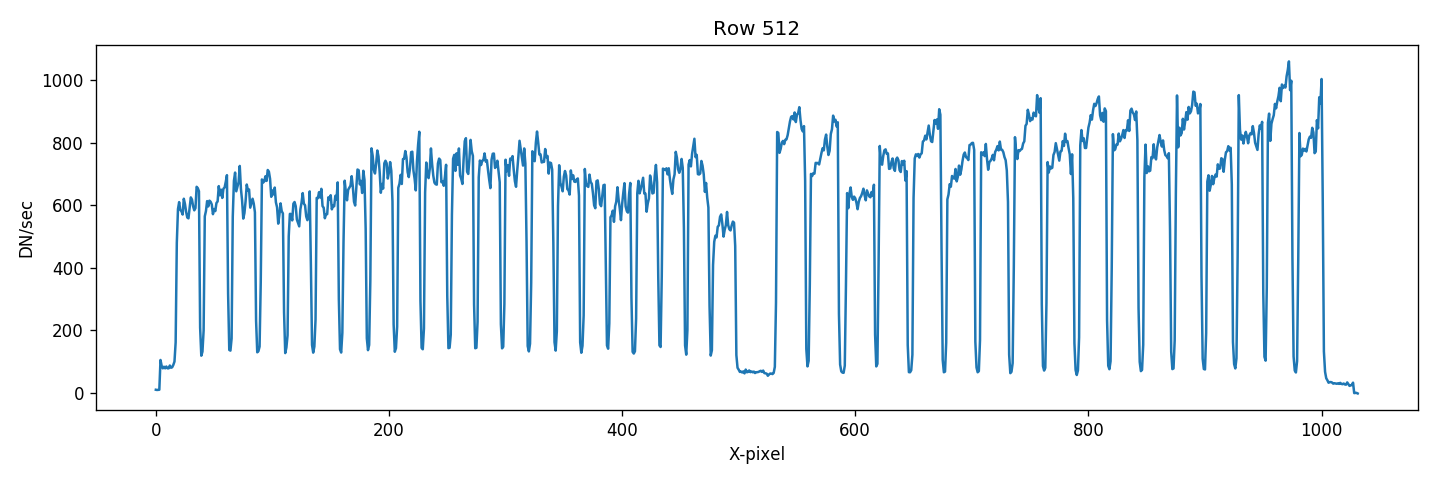

In [37]:
#--plot detector image
slope_img = (image_data[1,:,:]-image_data[0,:,:])/frame_delta_time
# slope_img = (image_data[ngroups+1,:,:]-image_data[ngroups,:,:])/frame_delta_time
plt.figure(figsize=(8,6))
plt.imshow(slope_img,vmin=100,vmax=700)
plt.xlabel('X-pixel')
plt.ylabel('Y-pixel')
plt.title('MRS detector image')
plt.tight_layout()

row = 512
plt.figure(figsize=(12,4))
if band[0] in ['1','4']:
    plt.plot(slope_img[row,:])
elif band[0] in ['2','3']:
    plt.plot(slope_img[row,:])
plt.xlabel('X-pixel')
plt.ylabel('DN/sec')
plt.title('Row {}'.format(row))
plt.tight_layout()

<IPython.core.display.Javascript object>


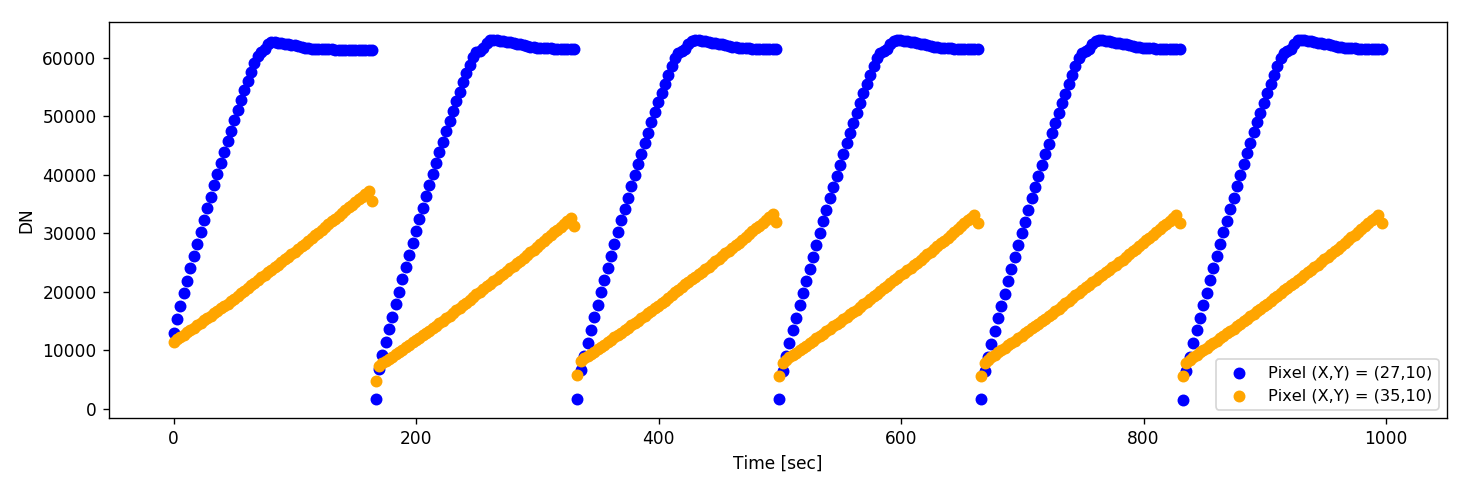

In [7]:
#--plot integration ramps from two pixels of different flux (six integrations)
plt.close('all')

plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(image_data[:,10,27]))*frame_delta_time,image_data[:,10,27],c='b',label='Pixel (X,Y) = ({},{})'.format(27,10))
plt.scatter(np.arange(len(image_data[:,10,35]))*frame_delta_time,image_data[:,10,35],c='orange',label='Pixel (X,Y) = ({},{})'.format(35,10))
plt.xlabel('Time [sec]')
plt.ylabel('DN')
plt.legend(loc='lower right',fontsize=9.5)
plt.tight_layout()

<IPython.core.display.Javascript object>


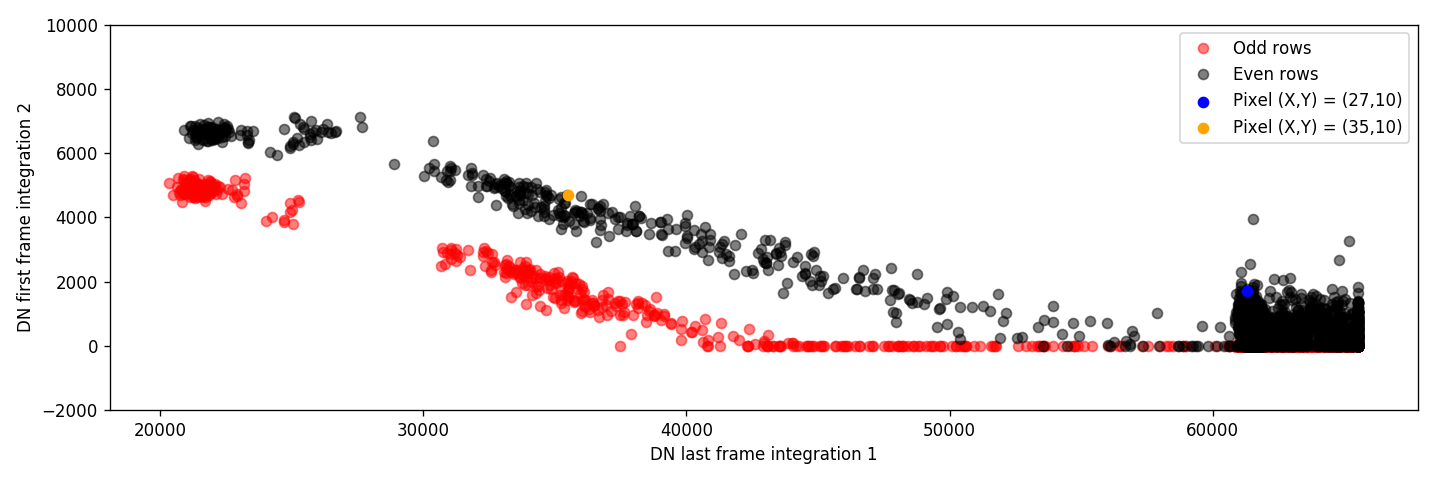

<IPython.core.display.Javascript object>


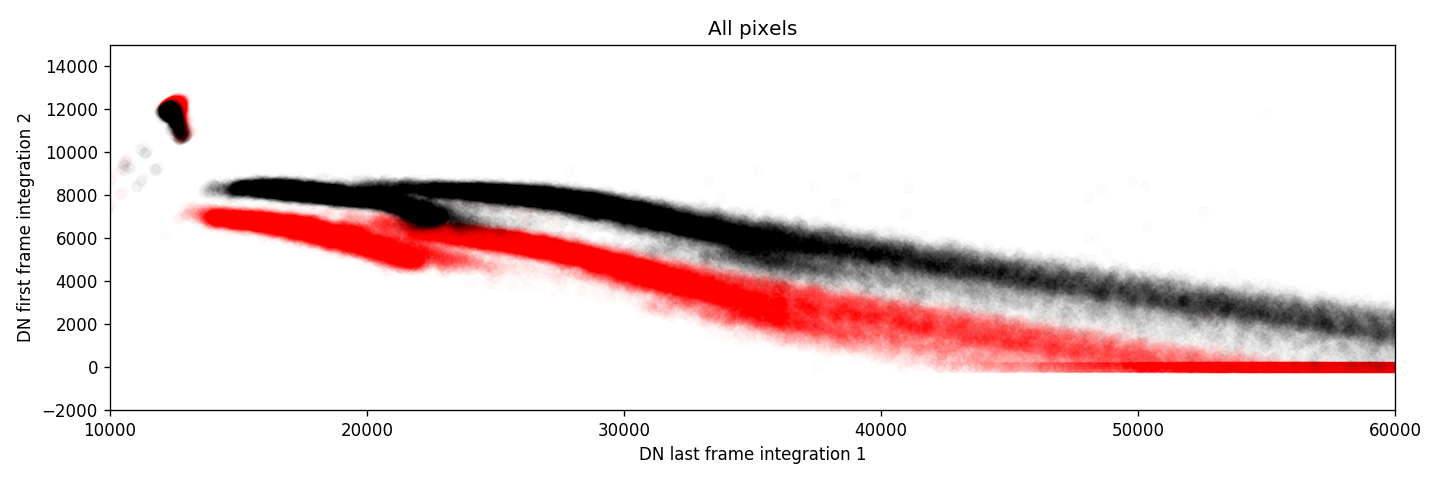

In [40]:
#--plot zero point relation
plt.close('all')

#-- plot for some pixels
DN_last_frame_int1_odd = image_data[ngroups-1,:10,10:516][1::2].ravel()
DN_last_frame_int1_even = image_data[ngroups-1,:10,10:516][::2].ravel()

DN_first_frame_int2_odd = image_data[ngroups,:10,10:516][1::2].ravel()
DN_first_frame_int2_even = image_data[ngroups,:10,10:516][::2].ravel()

plt.figure(figsize=(12,4))
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'ro',alpha=0.5,label='Odd rows',zorder=1)
plt.plot(DN_last_frame_int1_even,DN_first_frame_int2_even,'ko',alpha=0.5,label='Even rows',zorder=1)
plt.scatter(image_data[ngroups-1,10,27],image_data[ngroups,10,27],c='b',label='Pixel (X,Y) = ({},{})'.format(27,10),zorder=2)
plt.scatter(image_data[ngroups-1,10,35],image_data[ngroups,10,35],c='orange',label='Pixel (X,Y) = ({},{})'.format(35,10),zorder=2)
# plt.xlim(20000,60000)
plt.ylim(-2000,10000)
plt.xlabel('DN last frame integration 1')
plt.ylabel('DN first frame integration 2')
plt.legend()
plt.tight_layout()

#-- plot zero point relation for all pixels
DN_last_frame_int1_odd = image_data[ngroups-1,:,:516][1::2].ravel()
DN_last_frame_int1_even = image_data[ngroups-1,:,:516][::2].ravel()

DN_first_frame_int2_odd = image_data[ngroups,:,:516][1::2].ravel()
DN_first_frame_int2_even = image_data[ngroups,:,:516][::2].ravel()

plt.figure(figsize=(12,4))
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'ro',alpha=0.01)
plt.plot(DN_last_frame_int1_even,DN_first_frame_int2_even,'ko',alpha=0.01)
plt.xlim(10000,60000)
plt.ylim(-2000,15000)
plt.xlabel('DN last frame integration 1')
plt.ylabel('DN first frame integration 2')
plt.title('All pixels')
plt.tight_layout()

<IPython.core.display.Javascript object>


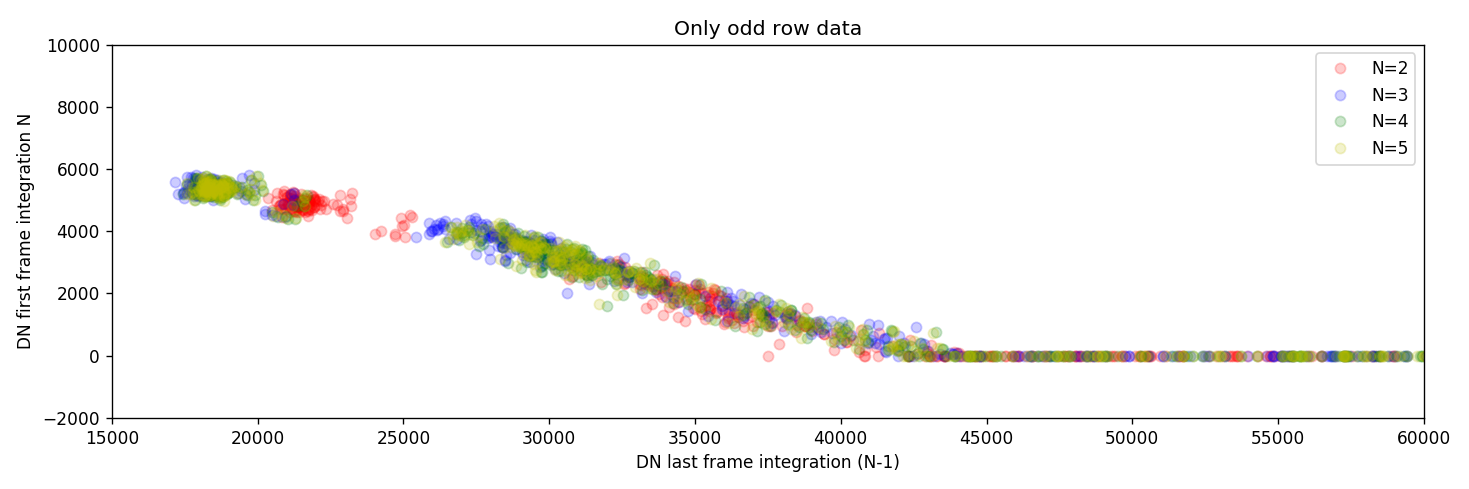

In [9]:
#--plot zero point relation for some pixels - 5 integrations (5 out of 6 integrations plotted to not cramp the plot too much)
plt.close('all')

plt.figure(figsize=(12,4))

# ramp 2 vs ramp 1
DN_last_frame_int1_odd = image_data[ngroups-1,:10,10:516][1::2].ravel()
DN_first_frame_int2_odd = image_data[ngroups,:10,10:516][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'ro',alpha=0.2,label='N=2')
# ramp 3 vs ramp 2
DN_last_frame_int1_odd = image_data[2*ngroups-1,:10,10:516][1::2].ravel()
DN_first_frame_int2_odd = image_data[2*ngroups,:10,10:516][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'bo',alpha=0.2,label='N=3')
# ramp 4 vs ramp 3
DN_last_frame_int1_odd = image_data[3*ngroups-1,:10,10:516][1::2].ravel()
DN_first_frame_int2_odd = image_data[3*ngroups,:10,10:516][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'go',alpha=0.2,label='N=4')
# ramp 5 vs ramp 4
DN_last_frame_int1_odd = image_data[4*ngroups-1,:10,10:516][1::2].ravel()
DN_first_frame_int2_odd = image_data[4*ngroups,:10,10:516][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'yo',alpha=0.2,label='N=5')
    
plt.xlim(15000,60000)
plt.ylim(-2000,10000)
plt.xlabel('DN last frame integration (N-1)')
plt.ylabel('DN first frame integration N')
plt.title('Only odd row data')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


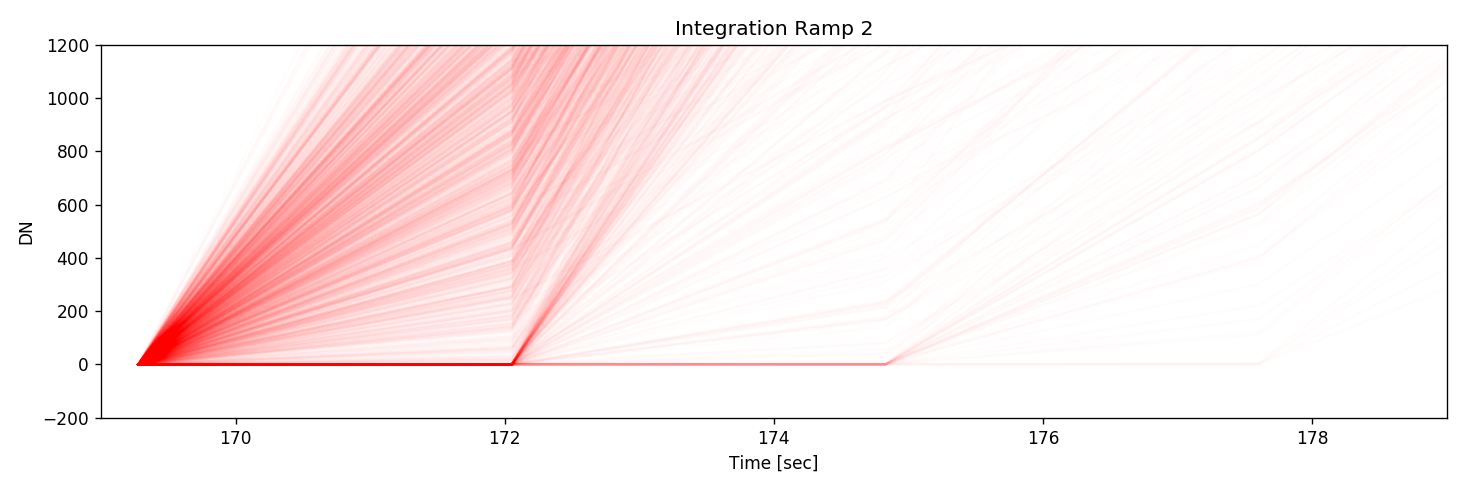

In [12]:
#--plot pixel ramps and zoom on low DN levels
plt.close('all')

plt.figure(figsize=(12,4))
for ypos in [1,3,5,7,9]:
    for xpos in np.arange(516):
        if image_data[ngroups-1,ypos,xpos]>45000.:
            time  = np.arange(1,nframes+1)[ngroups:2*ngroups]*frame_delta_time
            tramp = image_data[ngroups:2*ngroups,ypos,xpos]
            time2,tramp2 = time[tramp<58000],tramp[tramp<58000]
            plt.plot(time,tramp,'r',alpha=0.01)
plt.xlim(169,179)
plt.ylim(-200,1200)
plt.xlabel('Time [sec]')
plt.ylabel('DN')
plt.title('Integration Ramp 2')
plt.tight_layout()

40.7154645107 percent of the pixels are impacted


<IPython.core.display.Javascript object>


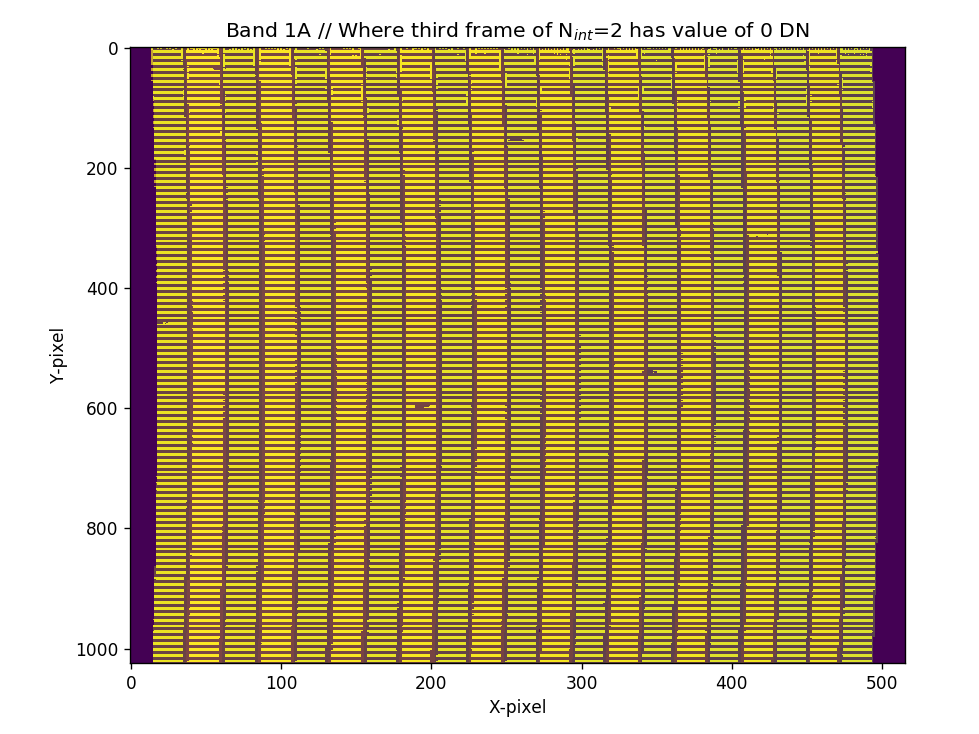

In [13]:
#--plot pixels impacted by a digital saturation of 0DN (caused by bright signals in previous integrations)
plt.close('all')

d2cMaps = funcs.load_obj('d2cMaps_band{}_tr10pc'.format(band),path=d2cMapDir)
if band[0] in ['1','4']:
    sel = np.where(image_data[ngroups,:,:516]==0)
elif band[0] in ['2','3']:
    sel = np.where(image_data[ngroups,:,516:]==0)

test_img = np.zeros((1024,1032))
test_img[sel] = 1

print '{} percent of the pixels are impacted'.format(100*len(sel[0])/(1024.*516.) )

plt.figure(figsize=(8,6))
plt.imshow(test_img[:,:516],aspect=0.4)
plt.imshow(d2cMaps['sliceMap'][:,:516],alpha=0.3,aspect=0.4)
plt.title(r'Band 1A // Where third frame of N$_{int}$=2 has value of 0 DN')
plt.xlabel('X-pixel')
plt.ylabel('Y-pixel')
plt.tight_layout()

In [14]:
plt.close('all')

## JPL8 data
We wish to examine whether the effect observed in the MRS data appears also in JPL data. To that end we use one of the exposures taken in the 05 Photometric Calibration Nr 1 test of the JPL8 test campaign. This selection was made on the basis that we wished to find data with more than one integration ramp, where all included ramps should reach the saturation level.

In [15]:
#--JPL8 Test ID: 05 Photometric Calibration Nr 1
jpl8_datapath = workDir+'JPL8_data/'
# NRESET = 1, intentionally saturated data
filename1 = jpl8_datapath+'MIRI_5598_176_S_20180320-224610_SCE1.fits'
filename2 = jpl8_datapath+'MIRI_5598_177_S_20180320-230952_SCE1.fits'
# NRESET = 3, intentionally saturated data
filename3 = jpl8_datapath+'MIRI_5598_208_S_20180321-010839_SCE1.fits'

filename = filename1

image_hdu = fits.open(filename)
image_data = fits.getdata(filename).astype('float')

print(filename.split('JPL8_data/')[1])
image_shape = image_data.shape
nints       = image_hdu[0].header['NINT']
ngroups     = image_hdu[0].header['NGROUPS']
nframes     = image_shape[0]
frame_delta_time = image_hdu[0].header['TFRAME']
print('Number of integrations: {}'.format(nints))
print('Number of groups/frames per integration: {}'.format(ngroups))
print('Total number of frames: {}'.format(nframes))
print('Time between samples: {} sec'.format(frame_delta_time))
print('LVL1 data shape: {}'.format(image_shape))

MIRI_5598_176_S_20180320-224610_SCE1.fits
Number of integrations: 5
Number of groups/frames per integration: 100
Total number of frames: 500
Time between samples: 2.775 sec
LVL1 data shape: (500, 1280, 1032)


In [16]:
image_hdu.close()

<IPython.core.display.Javascript object>


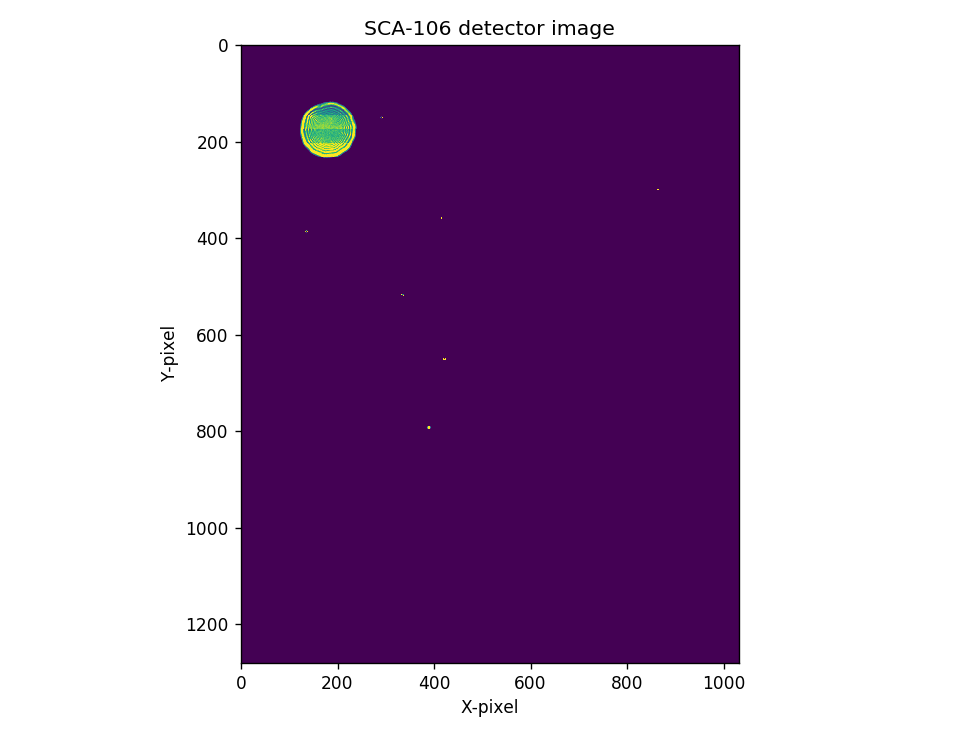

<IPython.core.display.Javascript object>


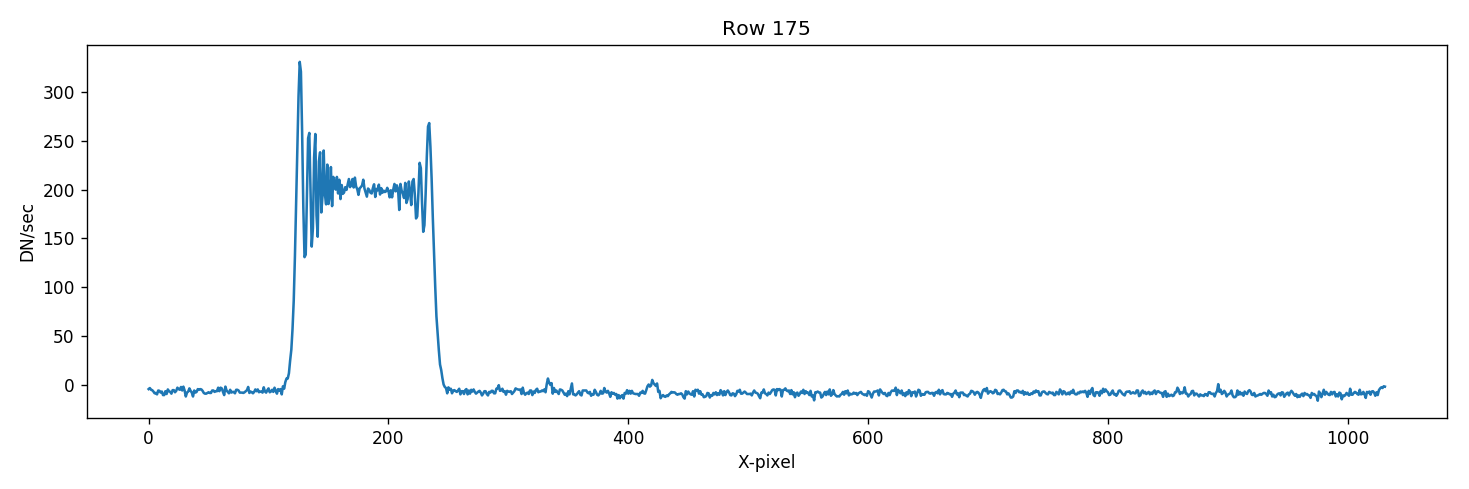

In [17]:
#--plot detector image
slope_img = (image_data[1,:,:]-image_data[0,:,:])/frame_delta_time
# slope_img = (image_data[ngroups+1,:,:]-image_data[ngroups,:,:])/frame_delta_time
plt.figure(figsize=(8,6))
plt.imshow(slope_img,vmin=100,vmax=250)
plt.xlabel('X-pixel')
plt.ylabel('Y-pixel')
plt.title('SCA-106 detector image')
plt.tight_layout()

row = 175
plt.figure(figsize=(12,4))
plt.plot(slope_img[row,:])
plt.xlabel('X-pixel')
plt.ylabel('DN/sec')
plt.title('Row {}'.format(row))
plt.tight_layout()

<IPython.core.display.Javascript object>


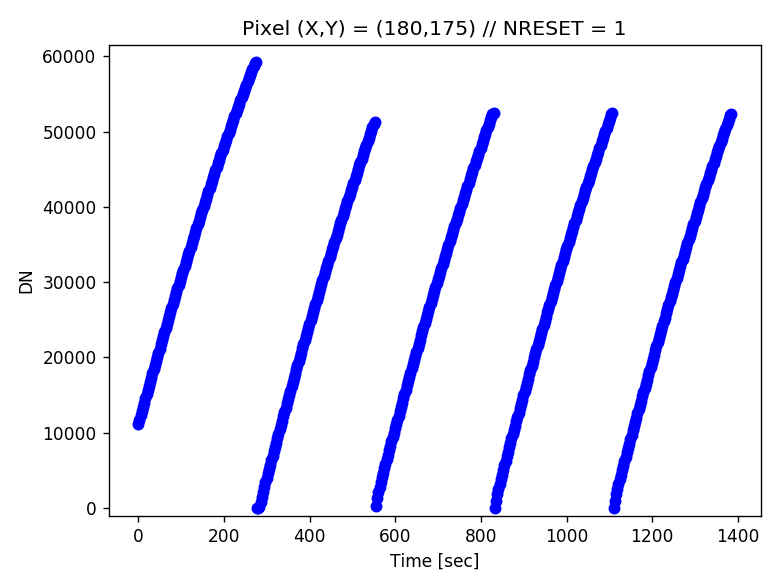

In [18]:
#--plot ramps
plt.close('all')
if filename in [filename1,filename2]:
    # NRESET=1
    plt.figure()
    time  = np.arange(len(image_data[:,175,180]))*frame_delta_time
    tramp = image_data[:,175,180]
    plt.plot(time,tramp,'bo')
    plt.xlabel('Time [sec]')
    plt.ylabel('DN')
    plt.title('Pixel (X,Y) = ({},{}) // NRESET = 1'.format(180,175))
    plt.ylim(-1000,61500)
    plt.tight_layout()
elif filename == filename3:
    # NRESET=3
    plt.figure()
    plt.plot(image_data[:,175,180],'bo')
    plt.xlabel('Element index')
    plt.ylabel('DN')
    plt.title('Pixel (X,Y) = ({},{}) // NRESET = 3'.format(180,175))
    plt.ylim(-1000,61500)
    plt.tight_layout()

### Source nr 1: semi-extended source on upper left hand corner

<IPython.core.display.Javascript object>


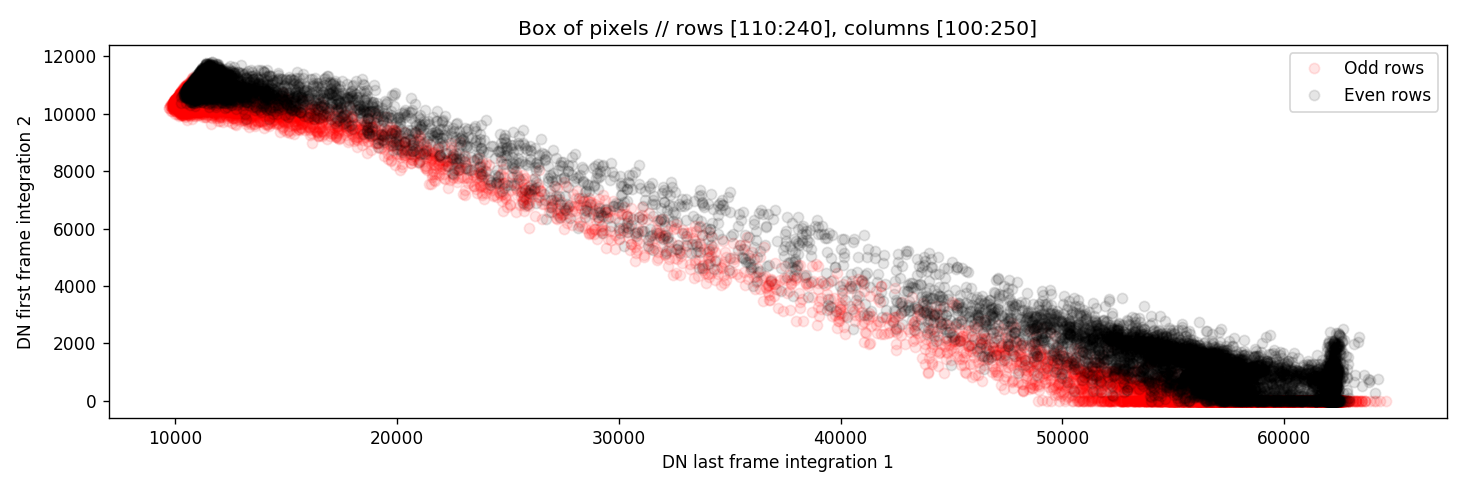

In [19]:
#--plot zero point relation for some pixels
plt.close('all')

DN_last_frame_int1_odd = image_data[ngroups-1,110:240,100:250][1::2].ravel()
DN_last_frame_int1_even = image_data[ngroups-1,110:240,100:250][::2].ravel()

DN_first_frame_int2_odd = image_data[ngroups,110:240,100:250][1::2].ravel()
DN_first_frame_int2_even = image_data[ngroups,110:240,100:250][::2].ravel()

plt.figure(figsize=(12,4))
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'ro',alpha=0.1,label='Odd rows')
plt.plot(DN_last_frame_int1_even,DN_first_frame_int2_even,'ko',alpha=0.1,label='Even rows')
plt.xlabel('DN last frame integration 1')
plt.ylabel('DN first frame integration 2')
plt.title('Box of pixels // rows [110:240], columns [100:250]')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


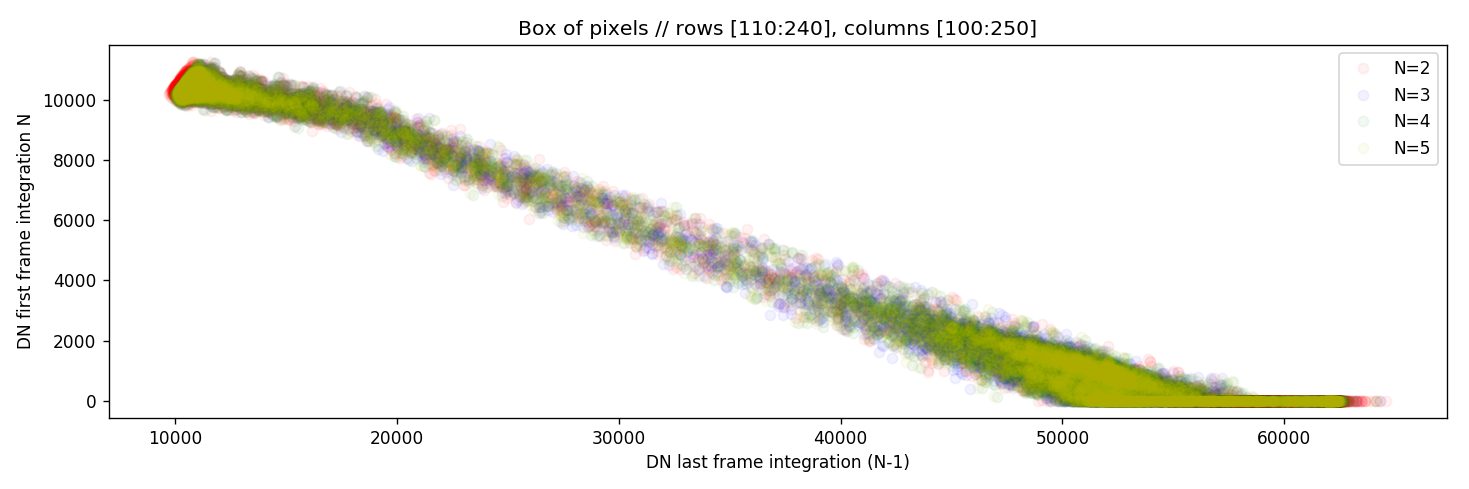

In [20]:
#--plot zero point relation for some pixels - all 5 integrations
plt.close('all')

plt.figure(figsize=(12,4))
DN_last_frame_int1_odd = image_data[ngroups-1,110:240,100:250][1::2].ravel()
DN_first_frame_int2_odd = image_data[ngroups,110:240,100:250][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'ro',alpha=0.05,label='N=2')

DN_last_frame_int1_odd = image_data[2*ngroups-1,110:240,100:250][1::2].ravel()
DN_first_frame_int2_odd = image_data[2*ngroups,110:240,100:250][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'bo',alpha=0.05,label='N=3')

DN_last_frame_int1_odd = image_data[3*ngroups-1,110:240,100:250][1::2].ravel()
DN_first_frame_int2_odd = image_data[3*ngroups,110:240,100:250][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'go',alpha=0.05,label='N=4')

DN_last_frame_int1_odd = image_data[4*ngroups-1,110:240,100:250][1::2].ravel()
DN_first_frame_int2_odd = image_data[4*ngroups,110:240,100:250][1::2].ravel()
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'yo',alpha=0.05,label='N=5')

plt.xlabel('DN last frame integration (N-1)')
plt.ylabel('DN first frame integration N')
plt.title('Box of pixels // rows [110:240], columns [100:250]')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


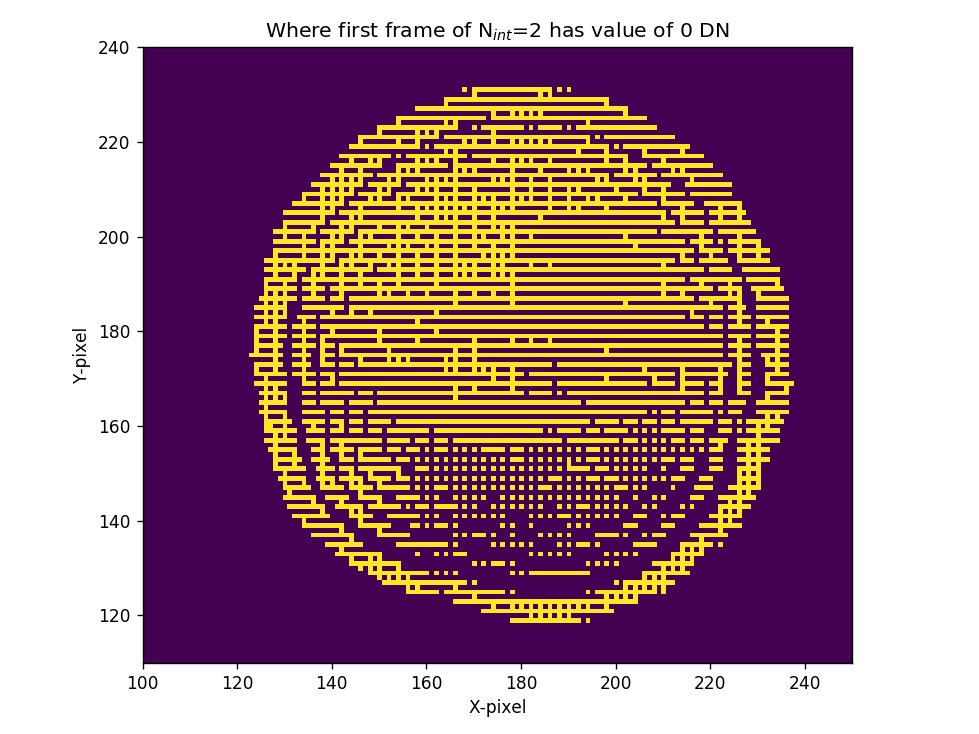

<IPython.core.display.Javascript object>


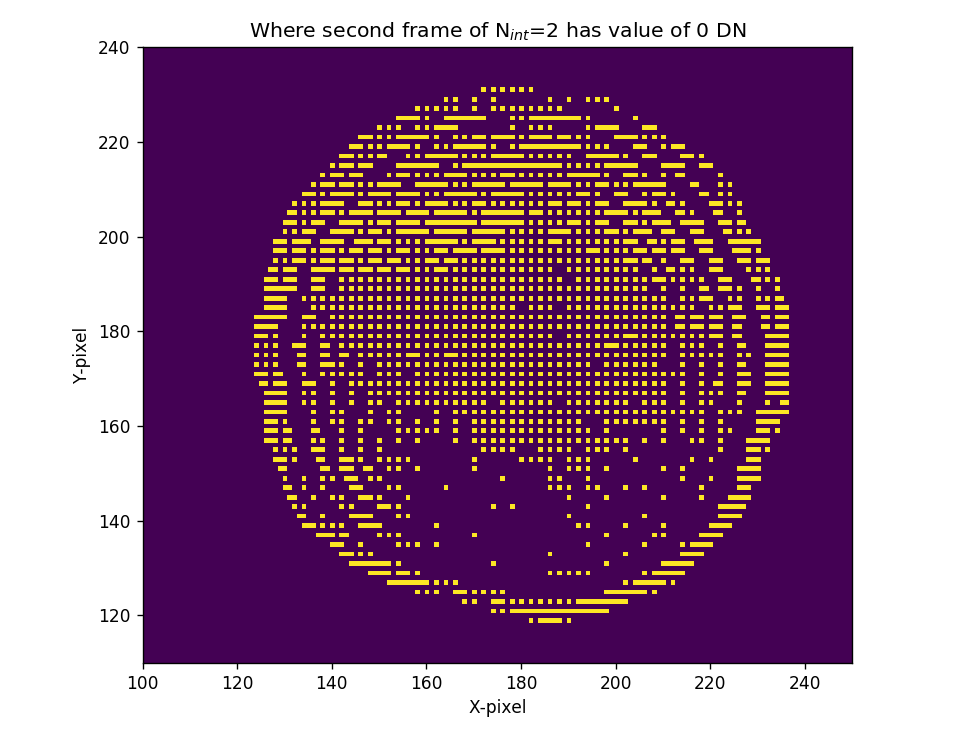

<IPython.core.display.Javascript object>


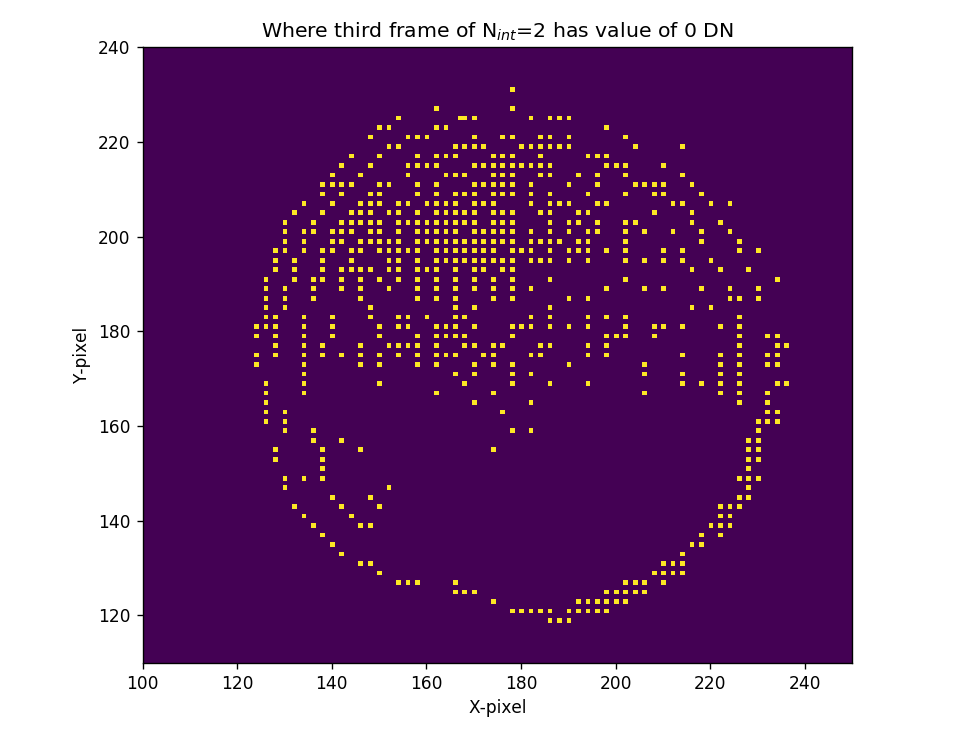

<IPython.core.display.Javascript object>


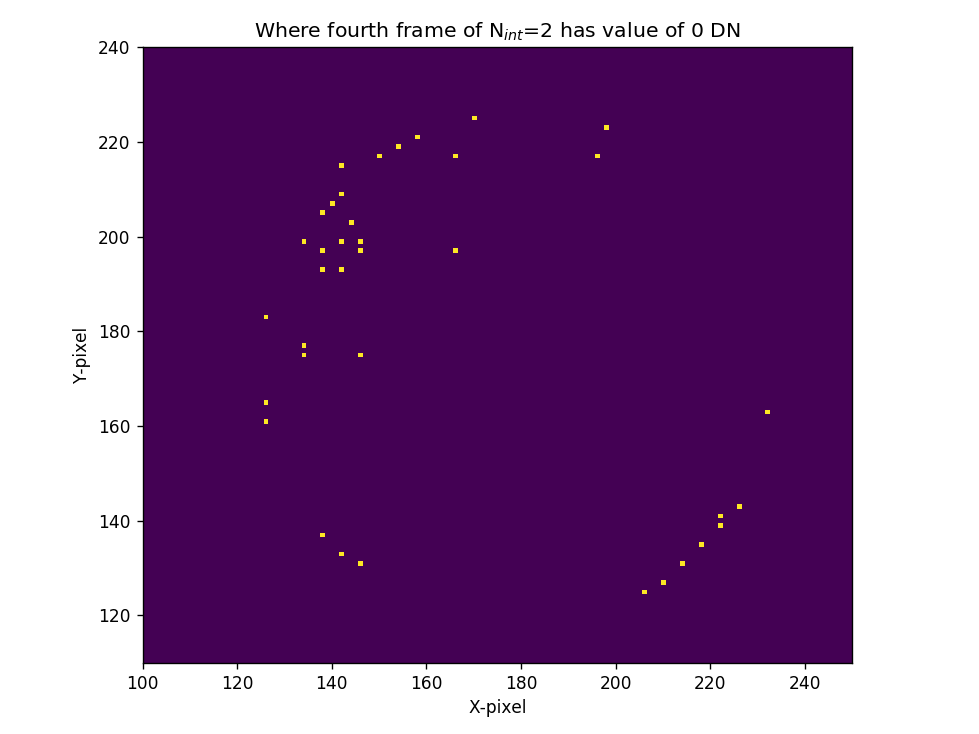

<IPython.core.display.Javascript object>


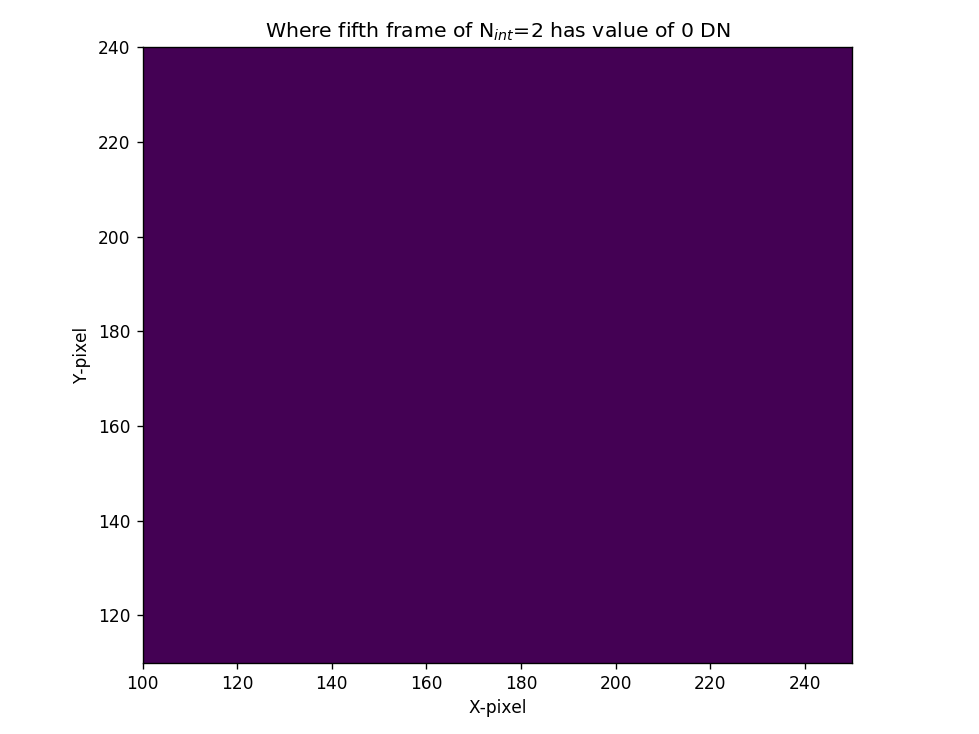

In [24]:
#--plot pixels impacted by digital saturation at 0DN
plt.close('all')

frames = np.arange(5)
names  = ['first','second','third','fourth','fifth']

for frame in frames:
    sel = np.where(image_data[ngroups+frame,:,:]==0)

    test_img = np.zeros((1024,1032))
    test_img[sel] = 1

    plt.figure(figsize=(8,6))
    plt.imshow(test_img)
    plt.xlim(100,250)
    plt.ylim(110,240)
    plt.title('Where '+names[frame]+' frame of N$_{int}$=2 has value of 0 DN')
    plt.xlabel('X-pixel')
    plt.ylabel('Y-pixel')
    plt.tight_layout()

### Source nr 2: point-like source 

<IPython.core.display.Javascript object>


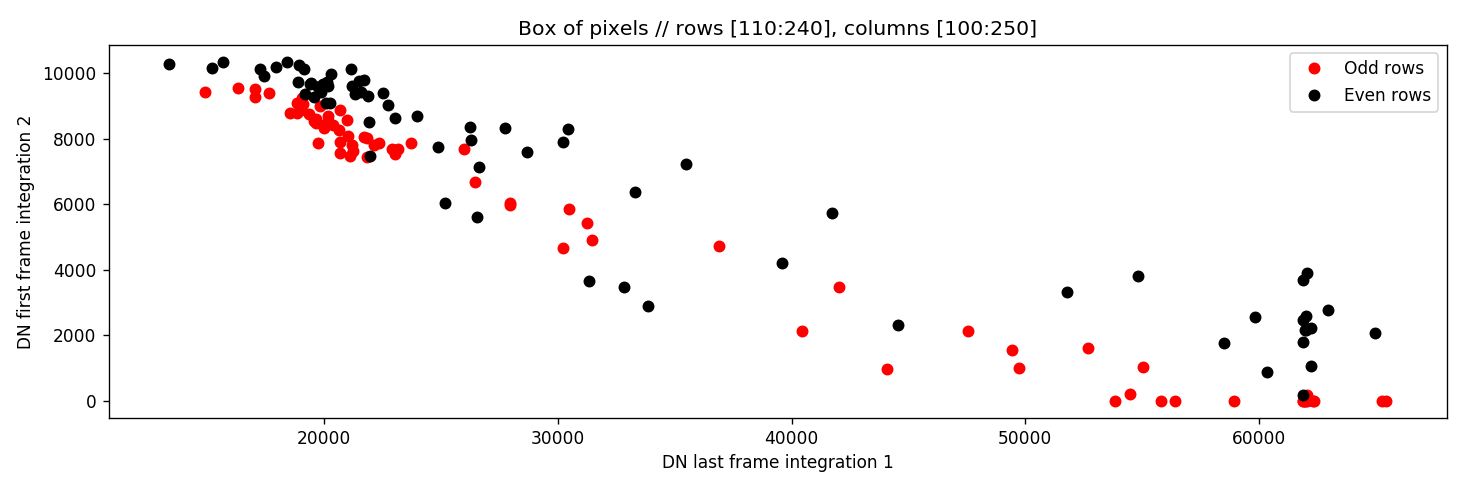

In [25]:
#--plot zero point relation for some pixels
plt.close('all')

DN_last_frame_int1_odd = image_data[ngroups-1,786:798,383:395][1::2].ravel()
DN_last_frame_int1_even = image_data[ngroups-1,786:798,383:395][::2].ravel()

DN_first_frame_int2_odd = image_data[ngroups,786:798,383:395][1::2].ravel()
DN_first_frame_int2_even = image_data[ngroups,786:798,383:395][::2].ravel()

plt.figure(figsize=(12,4))
plt.plot(DN_last_frame_int1_odd,DN_first_frame_int2_odd,'ro',label='Odd rows')
plt.plot(DN_last_frame_int1_even,DN_first_frame_int2_even,'ko',label='Even rows')
plt.xlabel('DN last frame integration 1')
plt.ylabel('DN first frame integration 2')
plt.title('Box of pixels // rows [110:240], columns [100:250]')
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


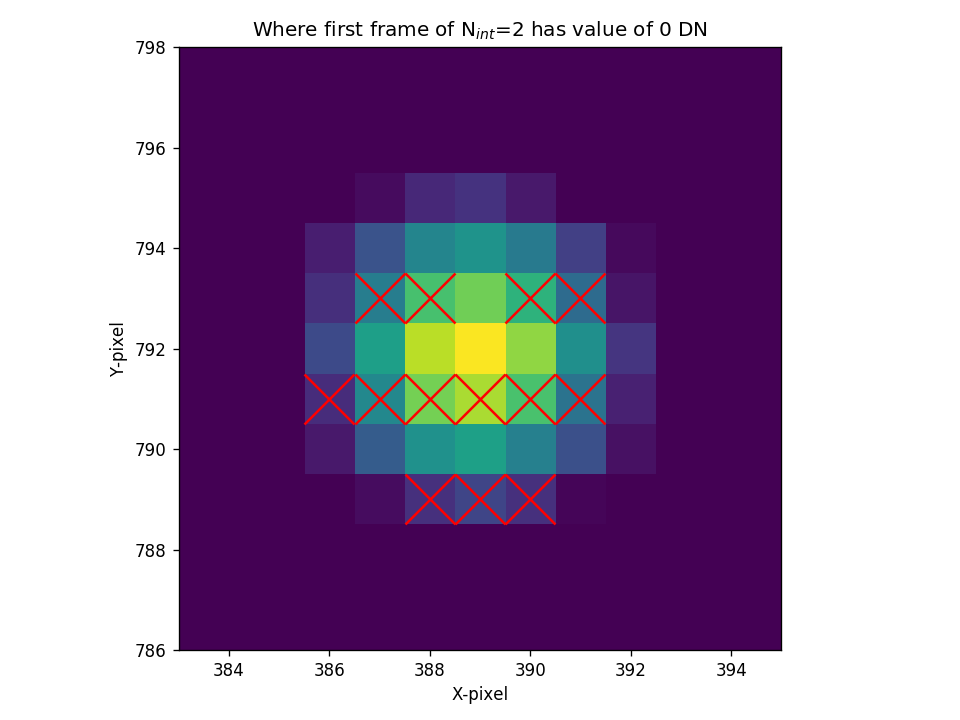

<IPython.core.display.Javascript object>


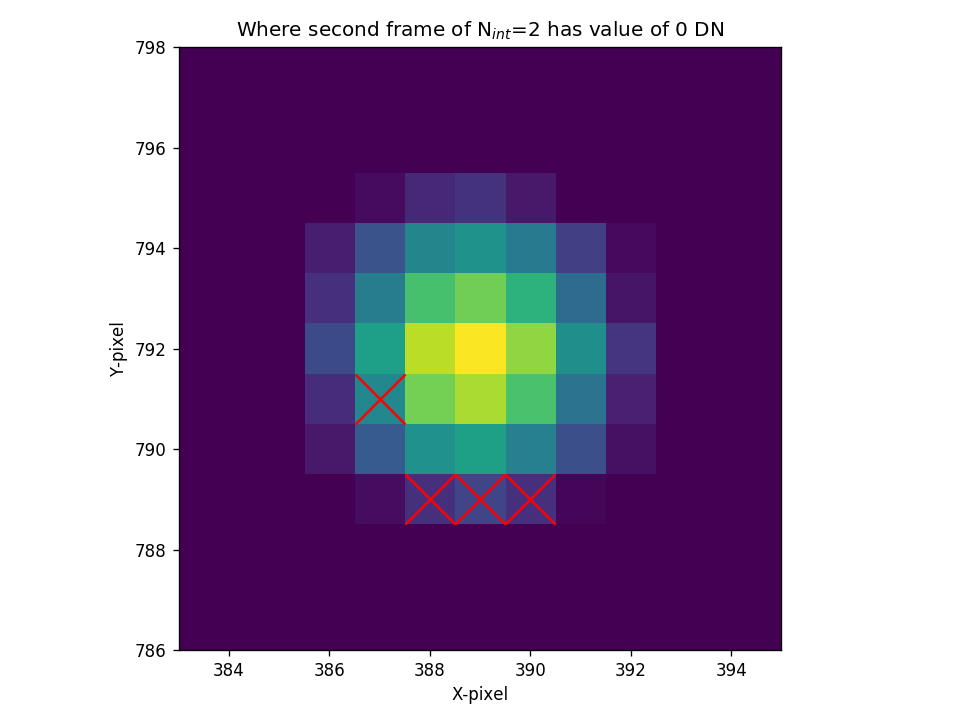

<IPython.core.display.Javascript object>


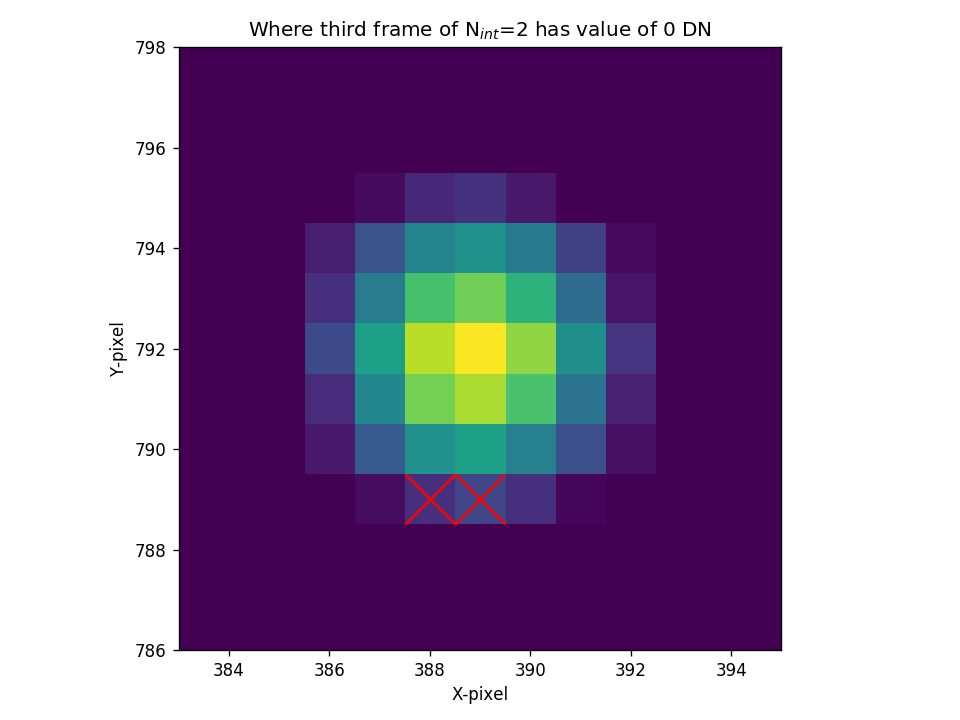

<IPython.core.display.Javascript object>


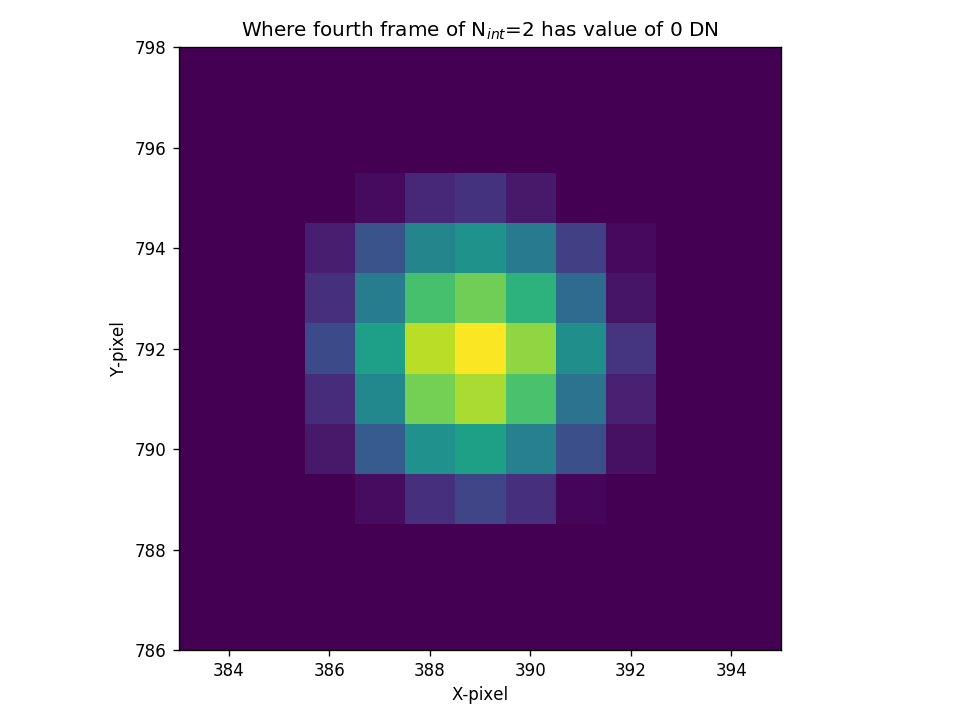

In [27]:
#--plot pixels impacted by digital saturation at 0DN
plt.close('all')

frames = np.arange(4)
names  = ['first','second','third','fourth']

for frame in frames:
    sel = np.where(image_data[ngroups+frame,:,:]==0)

    test_img = np.zeros((1024,1032))
    test_img[sel] = 1

    plt.figure(figsize=(8,6))
    plt.imshow(slope_img,vmin=100,vmax=600)
    plt.scatter(sel[1],sel[0],marker="x",s=900,c='r')
    plt.xlim(383,395)
    plt.ylim(786,798)
    plt.title('Where '+names[frame]+' frame of N$_{int}$=2 has value of 0 DN')
    plt.xlabel('X-pixel')
    plt.ylabel('Y-pixel')
    plt.tight_layout()

### MIRI Imager CV3 data
For completeness we examine the impact of the zero-point offset on MIRI Imager data. A dataset from the CV3 MIRM105 test is used (test ID IMG_RAD_18). Similar to the case of the MRS, this dataset was acquired to derive the non-linearity correction for the Imager.

* We use the F770W filter observation because it is the only observation in this test that has more than one integration.
* This dataset uses NRESET=1.

In [28]:
#--CV3 MIRM105 (IMG_RAD_18, ramps purposed for non-linearity correction)
cv3_datapath = workDir+'CV3_data/LVL1/'
filename = cv3_datapath + 'MIRM105-F770W-6021133621_1_493_SE_2016-01-21T14h53m00.fits'

image_hdu = fits.open(filename)
image_data = fits.getdata(filename)[:,:1024,:].astype('float')

print(filename.split('LVL1/')[1])
image_shape = image_data.shape
nints       = image_hdu[0].header['NINT']
ngroups     = image_hdu[0].header['NGROUP']
nframes     = image_shape[0]
readout     = image_hdu[0].header['READOUT']
frame_delta_time = image_hdu[0].header['TFRAME']
print('Number of integrations: {}'.format(nints))
print('Number of groups/frames per integration: {}'.format(ngroups))
print('Total number of frames: {}'.format(nframes))
print('Readout: {}'.format(readout))
print('Time between samples: {} sec'.format(frame_delta_time))
print('LVL1 data shape: {}'.format(image_shape))
print('')

# LVL2 DATA
filename = cv3_datapath + 'MIRM105-F770W-6021133621_1_493_SE_2016-01-21T14h53m00_LVL2.fits'
image_hdu_LVL2 = fits.open(filename)
image_data_LVL2 = image_hdu_LVL2[0].data[0,:,:]

print('LVL2 data shape: {}'.format(image_data_LVL2.shape))

MIRM105-F770W-6021133621_1_493_SE_2016-01-21T14h53m00.fits
Number of integrations: 5
Number of groups/frames per integration: 110
Total number of frames: 550
Readout: FAST
Time between samples: 2.77504 sec
LVL1 data shape: (550, 1024, 1032)

LVL2 data shape: (1024, 1032)


In [29]:
image_hdu.close()
image_hdu_LVL2.close()

<IPython.core.display.Javascript object>


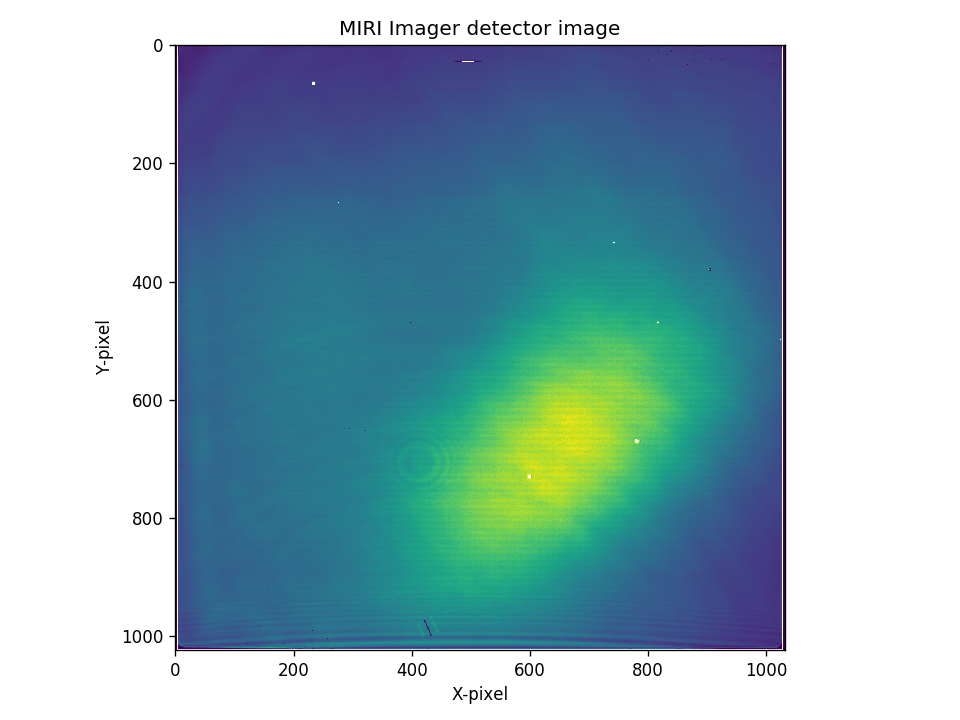

<IPython.core.display.Javascript object>


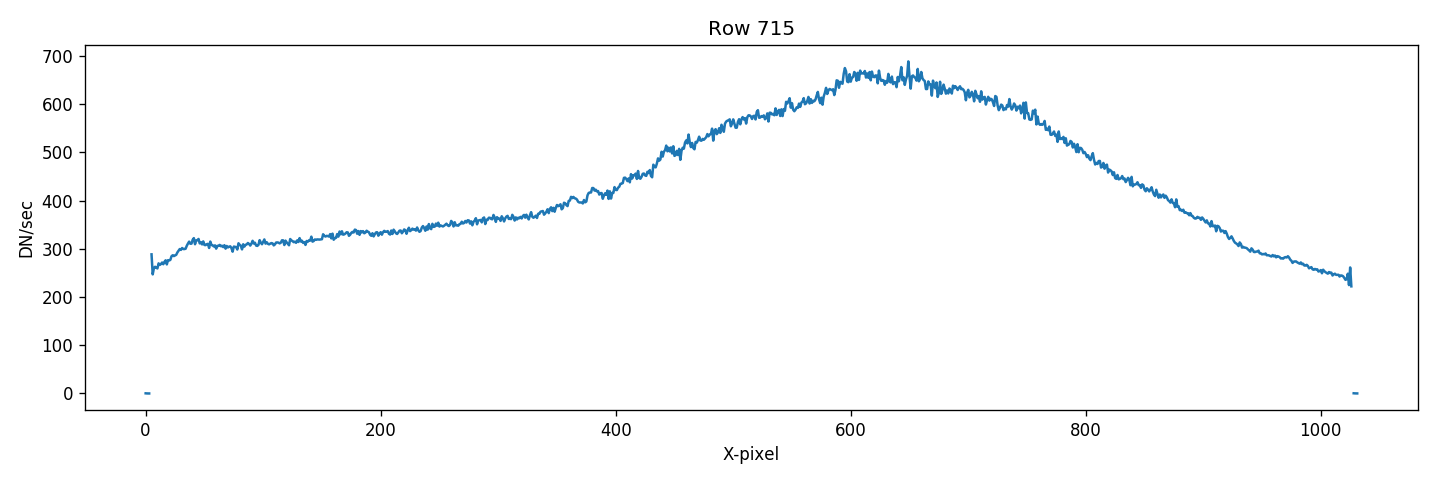

In [30]:
#--plot detector image
slope_img = image_data_LVL2.copy()
plt.figure(figsize=(8,6))
plt.imshow(slope_img,vmin=100,vmax=700)
plt.xlabel('X-pixel')
plt.ylabel('Y-pixel')
plt.title('MIRI Imager detector image')
plt.tight_layout()

row = 715
plt.figure(figsize=(12,4))
plt.plot(slope_img[row,:])
plt.xlabel('X-pixel')
plt.ylabel('DN/sec')
plt.title('Row {}'.format(row))
plt.tight_layout()

<IPython.core.display.Javascript object>


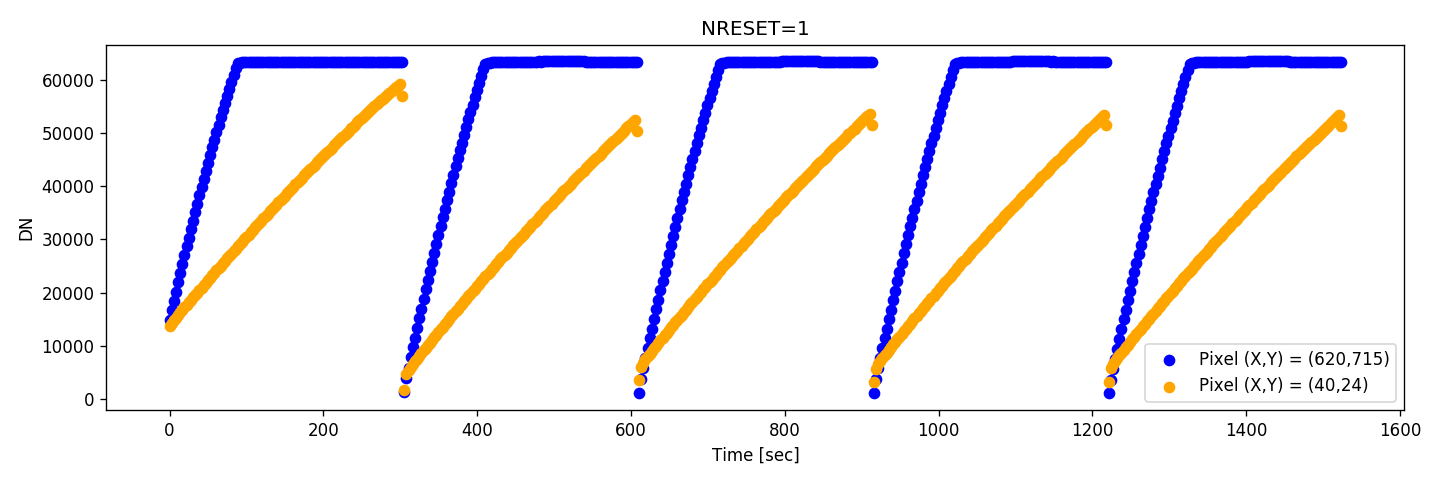

In [31]:
#--plot integration ramps
plt.close('all')

plt.figure(figsize=(12,4))
plt.scatter(np.arange(len(image_data[:,715,620]))*frame_delta_time,image_data[:,715,620],c='b',label='Pixel (X,Y) = ({},{})'.format(620,715))
plt.scatter(np.arange(len(image_data[:,24,40]))*frame_delta_time,image_data[:,24,40],c='orange',label='Pixel (X,Y) = ({},{})'.format(40,24))
plt.xlabel('Time [sec]')
plt.ylabel('DN')
plt.title('NRESET=1')
# plt.ylim(-1000,61500)
plt.legend(loc='lower right')
plt.tight_layout()

<IPython.core.display.Javascript object>


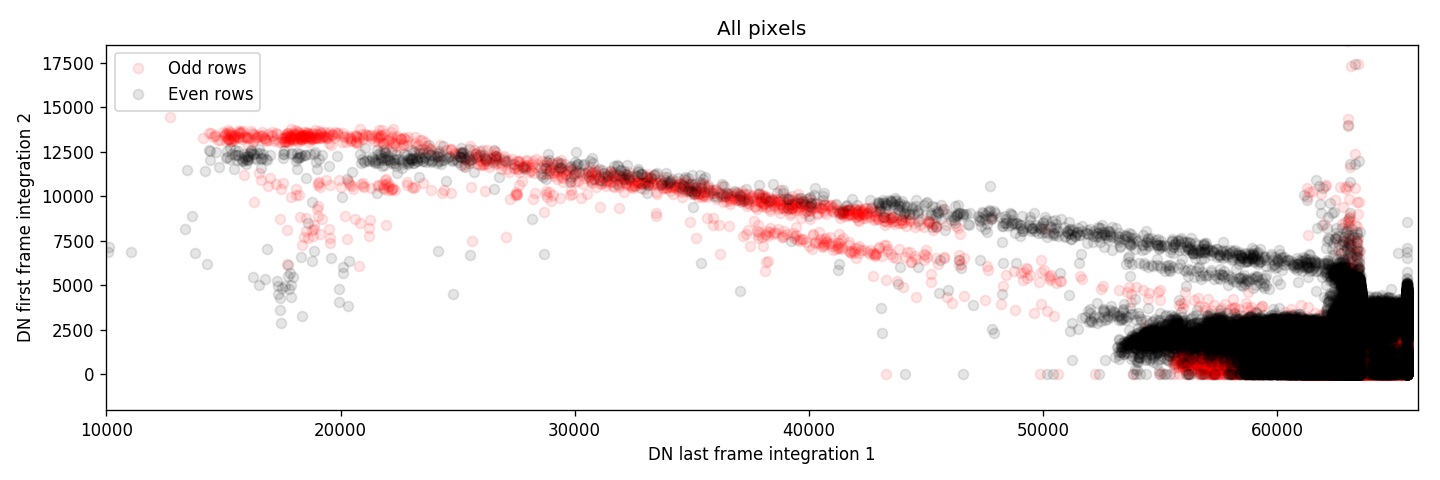

In [32]:
#--plot zero point offset relation for all pixels
plt.close('all')

# plot zero point relation for all pixels
DN_first_frame_int1_odd = image_data[ngroups-1,:,10:1022][1::2].ravel()
DN_first_frame_int1_even = image_data[ngroups-1,:,10:1022][::2].ravel()

DN_first_frame_int2_odd = image_data[ngroups,:,10:1022][1::2].ravel()
DN_first_frame_int2_even = image_data[ngroups,:,10:1022][::2].ravel()

plt.figure(figsize=(12,4))
plt.plot(DN_first_frame_int1_odd,DN_first_frame_int2_odd,'ro',alpha=0.1,label='Odd rows')
plt.plot(DN_first_frame_int1_even,DN_first_frame_int2_even,'ko',alpha=0.1,label='Even rows')
plt.xlim(10000,66000)
plt.ylim(-2000,18500)
plt.xlabel('DN last frame integration 1')
plt.ylabel('DN first frame integration 2')
plt.title('All pixels')
plt.legend()
plt.tight_layout()

14.23 percent of the pixels are impacted


<IPython.core.display.Javascript object>


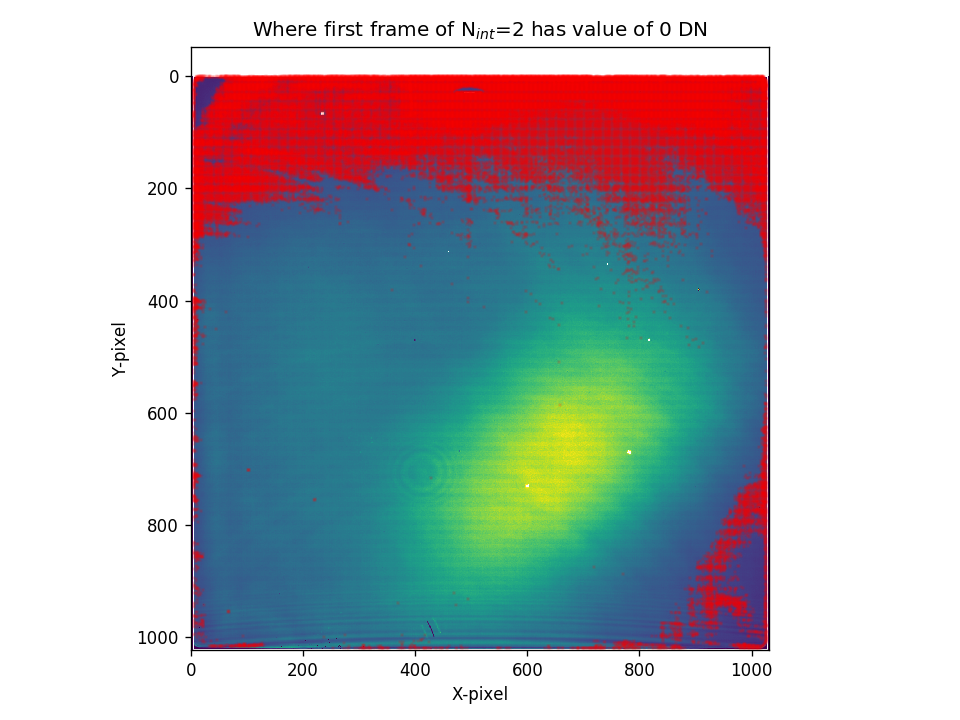

0.03 percent of the pixels are impacted


<IPython.core.display.Javascript object>


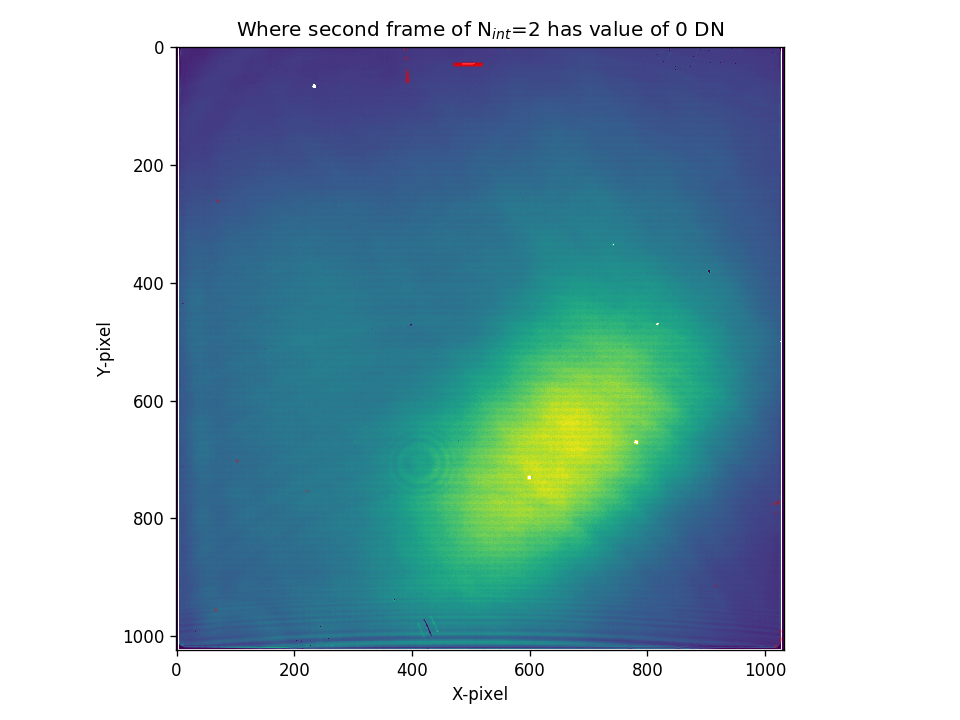

0.02 percent of the pixels are impacted


<IPython.core.display.Javascript object>


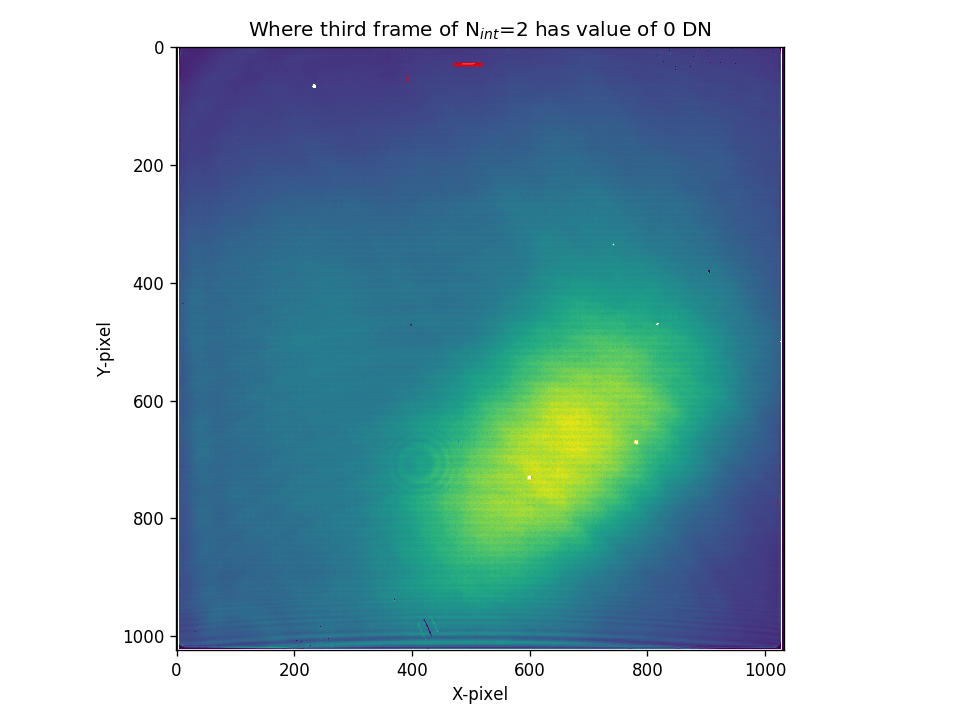

In [33]:
#--plot pixels impacted by digital saturation at 0DN
plt.close('all')

frames = np.arange(3)
names  = ['first','second','third']

for frame in frames:
    sel = np.where(image_data[ngroups+frame,:,:]==0)

    test_img = np.zeros((1024,1032))
    test_img[sel] = 1

    print '{} percent of the pixels are impacted'.format(round(100*len(sel[0])/(1024.*516.),2) )

    plt.figure(figsize=(8,6))
    # plt.imshow(test_img)
    plt.imshow(slope_img,vmin=100,vmax=700)
    plt.scatter(sel[1],sel[0],marker='s',s=0.5,c='r',alpha=0.1)
    plt.title('Where '+names[frame]+' frame of N$_{int}$=2 has value of 0 DN')
    plt.xlabel('X-pixel')
    plt.ylabel('Y-pixel')
    plt.tight_layout()